In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
data_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

In [3]:
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


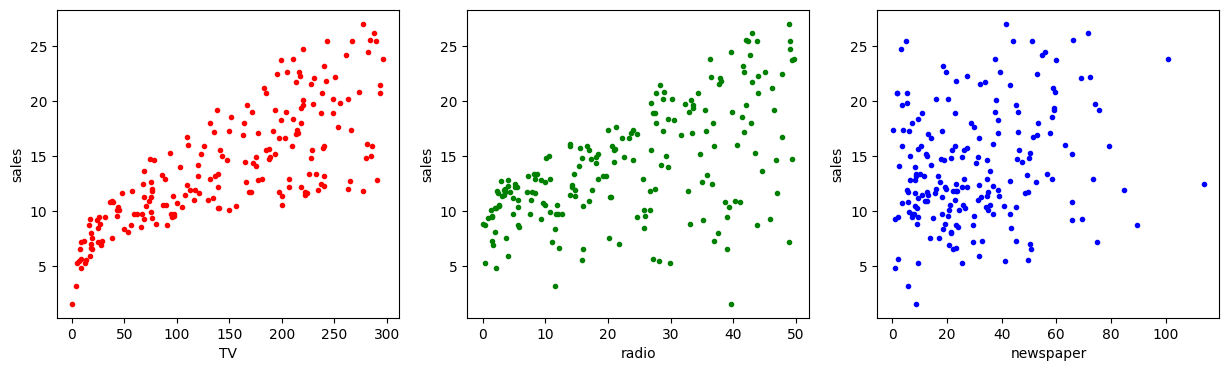

In [4]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

The first plot shows a sharp upward trend in the number of units sold as TV advertising increases. A similar trend is also found as radio advertising increases. However, in the last plot, there does not appear to be a relationship between newspaper advertising and the number of units sold.

---

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\hat{\beta_0} = \bar{y} - \beta_1\bar{x}$$
From the samples provided, first we find $\beta_1$ from the first expression and substitute the value of $\beta_1$ in the second expression for $\beta_0$.

In [5]:
X = data_df['TV'].to_numpy()
Y = data_df['sales'].to_numpy()

x_mean = X.mean()
y_mean = Y.mean()

beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum(np.power((X-x_mean), 2))

beta_0 = y_mean - (beta_1 * x_mean)

In [6]:
print(f"y = {beta_0} + {beta_1} x")

y = 7.0325935491276965 + 0.047536640433019736 x


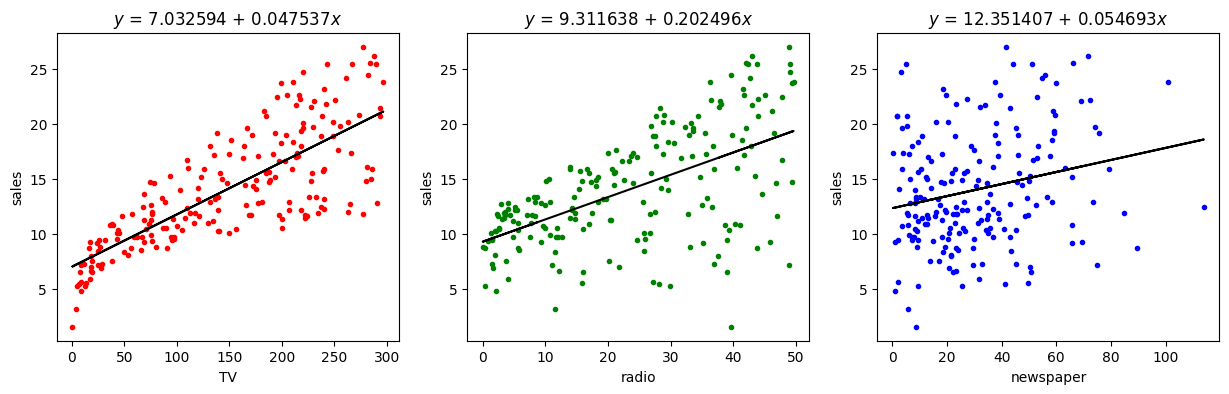

In [9]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

def train_plot(data_df, feature, ax,c):
    X = data_df[feature].to_numpy()
    Y = data_df['sales'].to_numpy()
    
    x_mean = X.mean()
    y_mean = Y.mean()
    
    beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum(np.power((X-x_mean), 2))
    
    beta_0 = y_mean - (beta_1 * x_mean)

    y_hat = beta_0 + np.dot(X, beta_1)
    
    ##Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title(("$y$ = %3f + %3f$x$" %(beta_0, beta_1)))

    
# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

Here, we performed a simple linear regression in each of the scatter plots. 

__TV vs. sales__

_TV_ is the input variable, one of the advertising mediums and _sales_ is the output variable. Parameters estimated from OLS has done pretty good work in fitting the data points. The intercept ($\beta_0$) has been estimated as $7.03$ and slope ($\beta_1$) has been estimated as $0.04$. The values of the parameters through OLS are the same to that through `Scikit-Learn.` The first plot depicts the simple linear regression with input as _TV_ and output as _sales_.

__radio vs. sales__

_radio_ is the input variable, one of the advertising mediums, and _sales_ is the output variable. Parameters estimated from OLS has done pretty good work in fitting the data points. The intercept ($\beta_0$) has been estimated as $9.31$ and slope ($\beta_1$) has been estimated as $0.21$. The values of the parameters through OLS are the same to that through `Scikit-Learn`.The second plot depicts the simple linear regression with input as _radio_ and output as _sales_.

__newspaper vs. sales__

_newspaper_ is the input variable, which is one of the advertising mediums, and _sales_ is the output variable. Parameters estimated from OLS has done pretty good work in fitting the data points. The intercept ($\beta_0$) has been estimated as $12.35$ and slope ($\beta_1$) has been estimated as $0.05$. The values of the parameters through OLS is the same as that through `Scikit-Learn`.The third plot depicts the simple linear regression with input as _newspaper_ and output as _sales_.